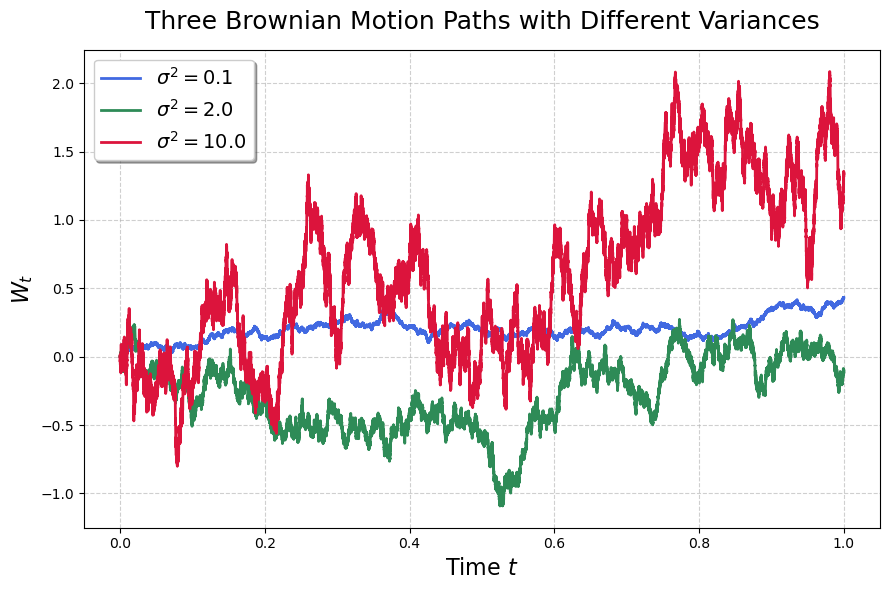

In [20]:
# Generate three Brownian motion paths with different variances and label them on the plot (more beautiful)

import numpy as np
import matplotlib.pyplot as plt

T = 1.
dt = 0.00001
nsteps = int(np.ceil(T/dt)) + 1
NPATH = 3  # Generate three paths

variances = [0.1, 2.0, 10.0]
colors = ['royalblue', 'seagreen', 'crimson']
labels = [r'$\sigma^2=0.1$', r'$\sigma^2=2.0$', r'$\sigma^2=10.0$']

plt.figure(figsize=(9, 6))
TSPAN = np.arange(0, nsteps*dt, dt)

for i, var in enumerate(variances):
    steps = np.random.randn(nsteps) * np.sqrt(var * dt)
    steps[0] = 0.
    W = np.cumsum(steps)
    plt.plot(TSPAN, W, color=colors[i], label=labels[i], linewidth=2)

plt.xlabel('Time $t$', fontsize=16)
plt.ylabel(r'$W_t$', fontsize=16)
plt.title('Three Brownian Motion Paths with Different Variances', fontsize=18, pad=15)
plt.legend(fontsize=14, loc='upper left', frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

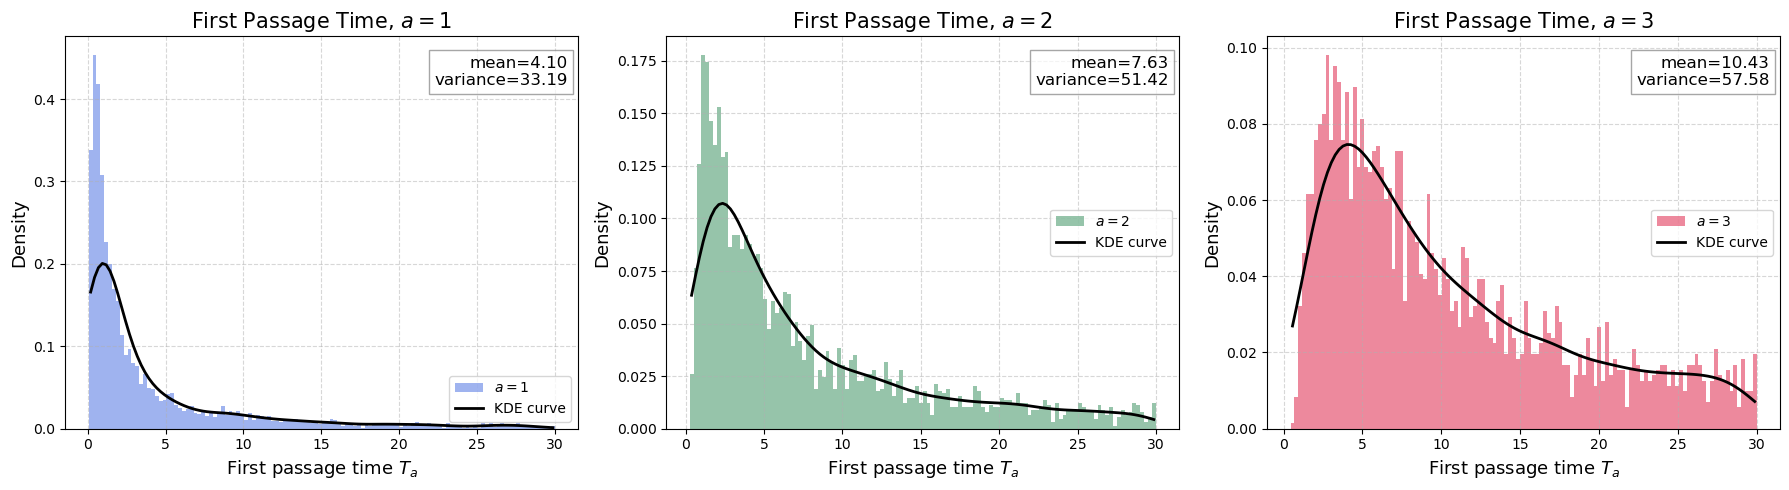

In [ ]:
# Improved: higher resolution, smaller interval, separate subplots, smooth curve on top of histogram

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

T = 30
dt = 0.0005  # 更小的步长
nsteps = int(T/dt)
N_sim = 5000
a_list = [1, 2, 3]
colors = ['royalblue', 'seagreen', 'crimson']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
bins = 120  

for idx, (a, color) in enumerate(zip(a_list, colors)):
    first_passage_times = []
    for _ in range(N_sim):
        W = np.cumsum(np.random.randn(nsteps) * np.sqrt(dt))
        idxs = np.where(W >= a)[0]
        if len(idxs) > 0:
            t_hit = idxs[0] * dt
            first_passage_times.append(t_hit)
    first_passage_times = np.array(first_passage_times)
    ax = axes[idx]
    counts, bin_edges, _ = ax.hist(first_passage_times, bins=bins, density=True, alpha=0.5, color=color, label=f'$a={a}$')
    # 曲线平滑连接
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    kde = gaussian_kde(first_passage_times)
    ax.plot(bin_centers, kde(bin_centers), color='black', linewidth=2, label='KDE curve')
    mean_val = first_passage_times.mean()
    std_val = first_passage_times.std()
    # 在图中打印均值和方差
    ax.text(0.98, 0.95, f'mean={mean_val:.2f}\nvariance={std_val**2:.2f}',
            transform=ax.transAxes, fontsize=12, color='black',
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
    ax.set_xlabel('First passage time $T_a$', fontsize=13)
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(f'First Passage Time, $a={a}$', fontsize=15)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

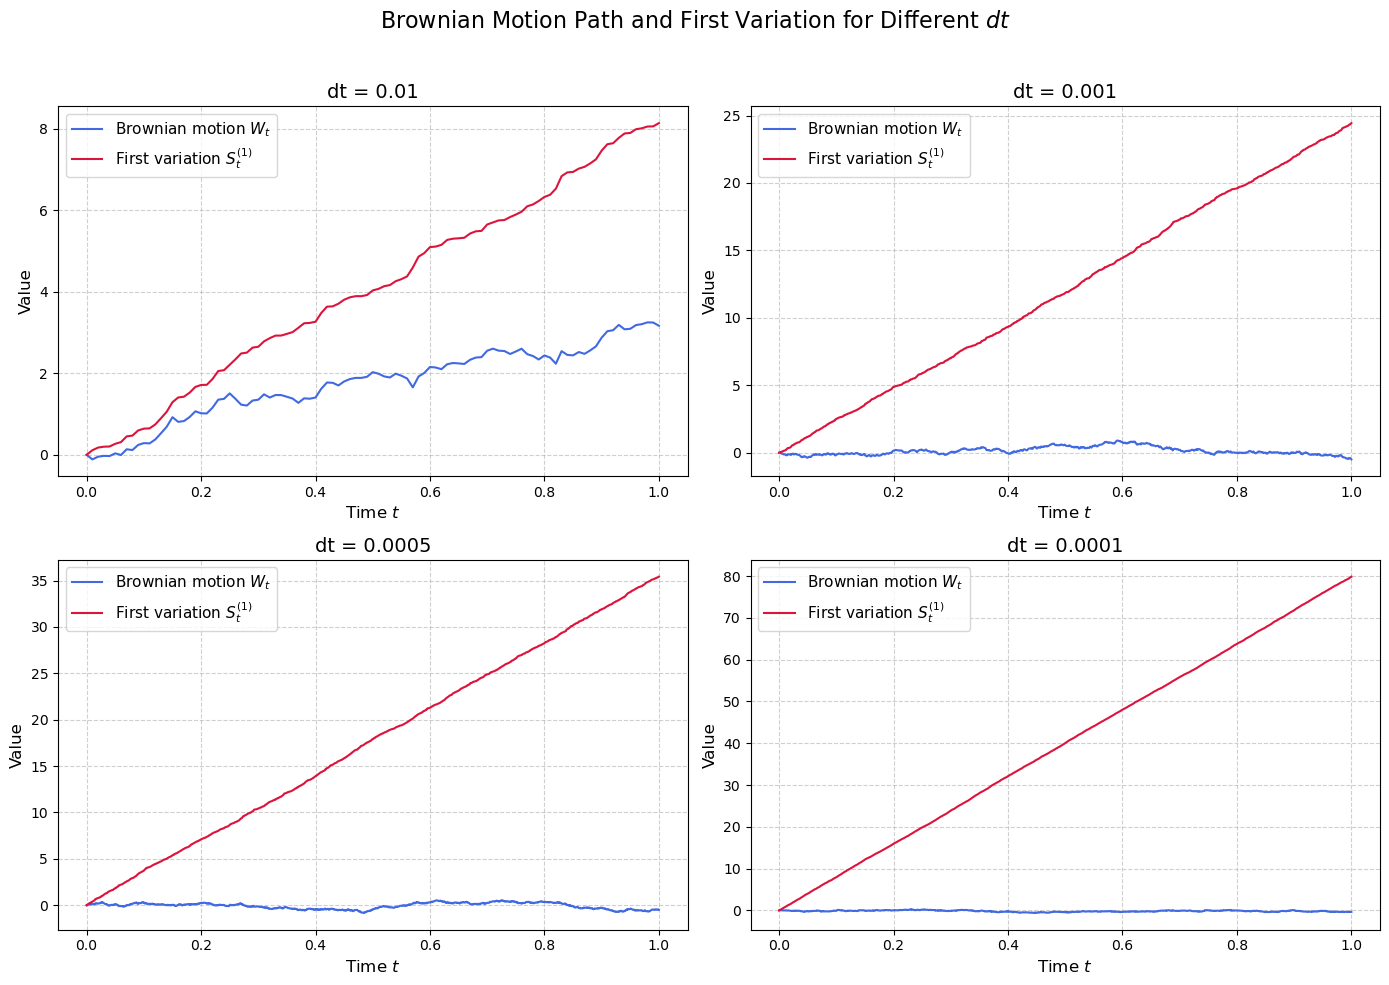

In [33]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0
dt_list = [0.01, 0.001, 0.0005, 0.0001]
titles = [f'dt = {dt}' for dt in dt_list]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, dt in enumerate(dt_list):
    nsteps = int(T / dt) + 1
    tspan = np.linspace(0, T, nsteps)
    W = np.zeros(nsteps)
    dW = np.random.randn(nsteps - 1) * np.sqrt(dt)
    W[1:] = np.cumsum(dW)
    first_var = np.zeros(nsteps)
    first_var[1:] = np.cumsum(np.abs(np.diff(W)))
    ax = axes[i]
    ax.plot(tspan, W, label='Brownian motion $W_t$', color='royalblue')
    ax.plot(tspan, first_var, label='First variation $S_t^{(1)}$', color='crimson')
    ax.set_xlabel('Time $t$', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(titles[i], fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Brownian Motion Path and First Variation for Different $dt$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

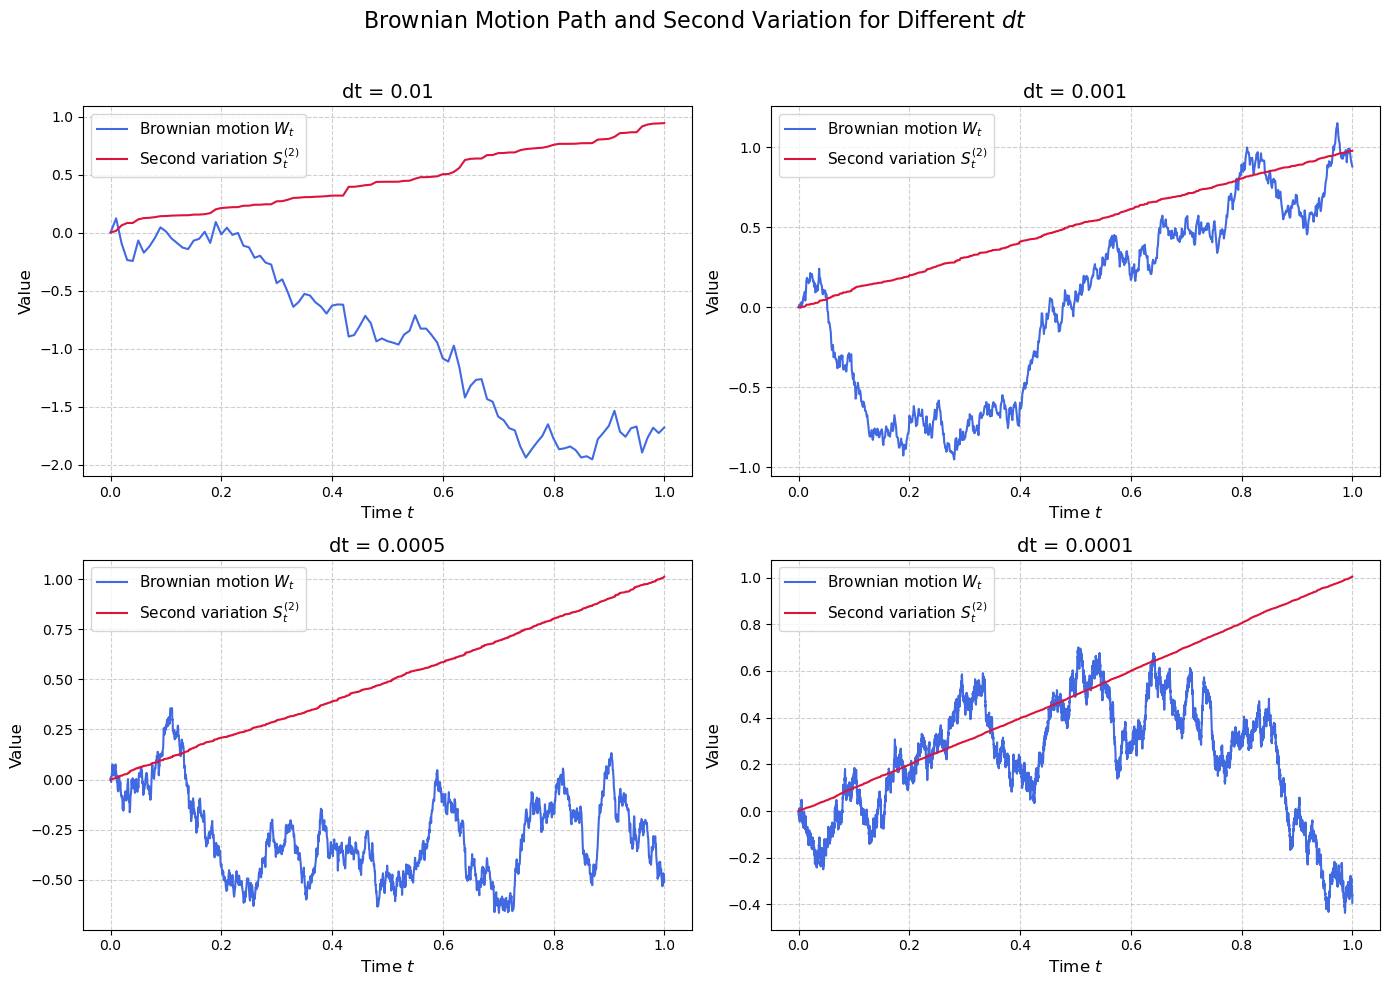

In [34]:

import numpy as np
import matplotlib.pyplot as plt

T = 1.0
dt_list = [0.01, 0.001, 0.0005, 0.0001]
titles = [f'dt = {dt}' for dt in dt_list]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, dt in enumerate(dt_list):
    nsteps = int(T / dt) + 1
    tspan = np.linspace(0, T, nsteps)
    W = np.zeros(nsteps)
    dW = np.random.randn(nsteps - 1) * np.sqrt(dt)
    W[1:] = np.cumsum(dW)
    first_var = np.zeros(nsteps)
    first_var[1:] = np.cumsum(np.pow(np.diff(W), 2))  # 二阶变差
    ax = axes[i]
    ax.plot(tspan, W, label='Brownian motion $W_t$', color='royalblue')
    ax.plot(tspan, first_var, label='Second variation $S_t^{(2)}$', color='crimson')
    ax.set_xlabel('Time $t$', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(titles[i], fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Brownian Motion Path and Second Variation for Different $dt$', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



